In [1]:
conda install -c conda-forge fbprophet 


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda update -n base -c defaults connda


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Applications/anaconda3
  package name: connda



Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr

import matplotlib.pyplot as plt
%matplotlib inline

import datetime as datetime

from fbprophet import Prophet
from sklearn import metrics

/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
start = datetime.datetime(2015, 1, 5)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start = start)
df_2492.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,17.153900,16.943001,17.153900,17.153900,1136512.0,14.355721
2015-01-06,17.013300,16.661800,16.943001,16.661800,1451577.0,13.943893
2015-01-07,16.732100,16.240000,16.661800,16.450899,1773755.0,13.767396
2015-01-08,16.802401,16.591499,16.591499,16.661800,1169227.0,13.943893
2015-01-09,16.872700,16.661800,16.802401,16.802401,680627.0,14.061560


## 用收盤價繪製圖表

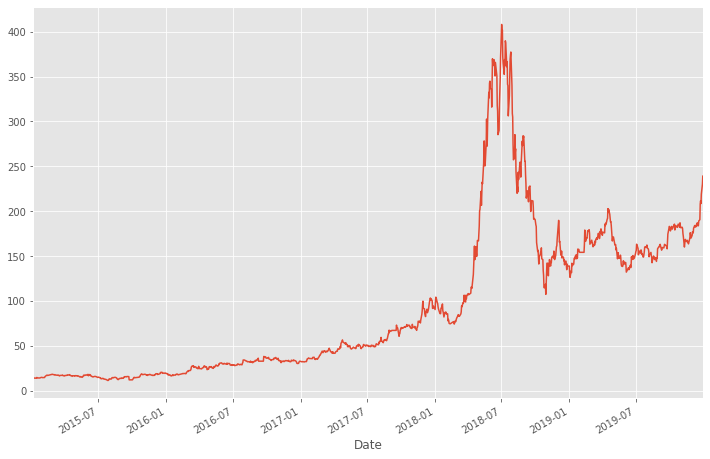

In [8]:
plt.style.use('ggplot')
df_2492['Adj Close'].plot(figsize=(12, 8))

In [23]:
new_df_2492 = pd.DataFrame(df_2492['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
new_df_2492.head()

,ds,y
0,2015-01-05,14.355721
1,2015-01-06,13.943893
2,2015-01-07,13.767396
3,2015-01-08,13.943893
4,2015-01-09,14.061560


## 使用Prophet 來預測股票

### 這邊跟課堂上學的預測差不多，都是三步驟

In [24]:
new_df_2492['y']=np.log(new_df_2492['y'])

model = Prophet()

model.fit(new_df_2492)

future = model.make_future_dataframe(periods = 365)

forecast = model.predict(future)

forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-05,2.709261,2.629589,2.817518,2.709261,2.709261,0.008736,0.008736,0.008736,0.013033,0.013033,0.013033,-0.004297,-0.004297,-0.004297,0.0,0.0,0.0,2.717997
1,2015-01-06,2.709533,2.612173,2.802212,2.709533,2.709533,0.004833,0.004833,0.004833,0.014368,0.014368,0.014368,-0.009534,-0.009534,-0.009534,0.0,0.0,0.0,2.714366
2,2015-01-07,2.709805,2.614688,2.805371,2.709805,2.709805,-0.001022,-0.001022,-0.001022,0.013671,0.013671,0.013671,-0.014692,-0.014692,-0.014692,0.0,0.0,0.0,2.708784
3,2015-01-08,2.710077,2.605614,2.790878,2.710077,2.710077,-0.007696,-0.007696,-0.007696,0.012005,0.012005,0.012005,-0.019701,-0.019701,-0.019701,0.0,0.0,0.0,2.702382
4,2015-01-09,2.710349,2.599853,2.796807,2.710349,2.710349,-0.011966,-0.011966,-0.011966,0.012522,0.012522,0.012522,-0.024489,-0.024489,-0.024489,0.0,0.0,0.0,2.698383


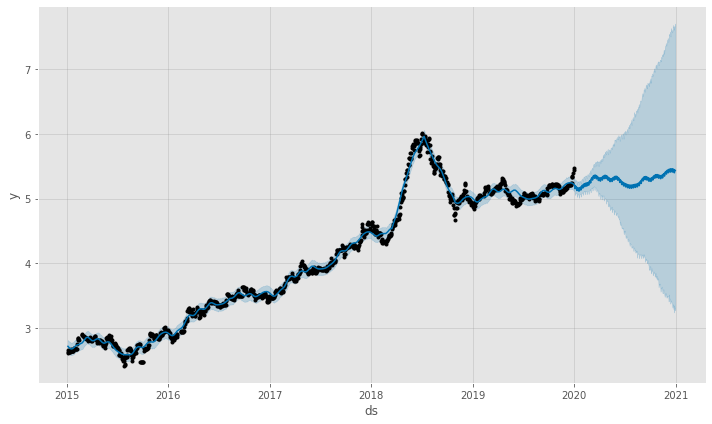

In [25]:
figure = model.plot(forecast)

## 藍色區域越大，顯示誤差越大，也就是日期距離現在越久，預測越不準

## 因為未來還沒有發生，所以不知道是否會準，但想知道這個模式在過去的預測情形，
## 因此畫圖看誤差，往回看1000筆資料

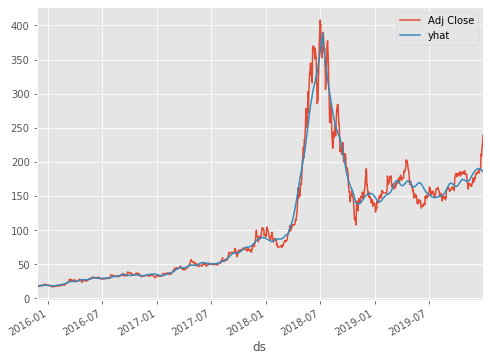

In [29]:
df_2492_close = pd.DataFrame(df_2492['Adj Close'])
four_years = forecast.set_index('ds').join(df_2492_close)
four_years = four_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(1000)
four_years['yhat']=np.exp(four_years.yhat)
four_years['yhat_upper']=np.exp(four_years.yhat_upper)
four_years['yhat_lower']=np.exp(four_years.yhat_lower)
four_years[['Adj Close', 'yhat']].plot(figsize=(8, 6))

## 算完以後還是不知道銀行投資的AI是怎麼根據個人風險承受度推薦股票的

